In [2]:
pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 279.3 kB/s eta 0:02:19
   ---------------------------------------- 0.1/38.8 MB 409.6 kB/s eta 0:01:35
   ---------------------------------------- 0.1/38.8 MB 599.1 kB/s eta 0:01:05
   ---------------------------------------- 0.2/38.8 MB 827.9 kB/s eta 0:00:47
   ---------------------------------------- 0.2/38.8 MB 827.9 kB/s eta 0:00:47
   ---------------------------------------- 0.2/38.8 MB 687.0 kB/s eta 0:00:57
   ---------------------------------------- 0.3/38.8 MB 838.1 kB/s eta 0:00:46
   ---------------------------------------- 0.3/38.8 MB 838.1 kB/s eta 0:00:46
   ---------------------------------------- 0.4/38.8 MB 802.3 kB/s eta 0:00:48
   ---------------------------------------- 0.4/38.8 MB 802.3 kB/s eta 0:00:48


In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread('./test_images/virat_kohli.jpg_large')
img.shape

(1350, 1080, 3)

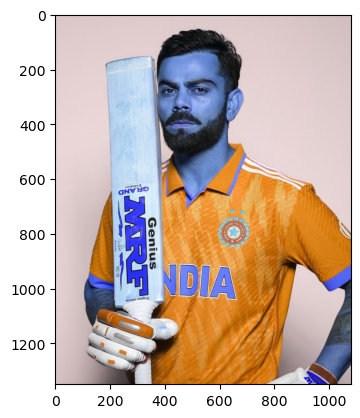

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
print(gray)

[[200 200 200 ... 192 192 192]
 [200 200 200 ... 192 192 192]
 [201 201 201 ... 192 192 192]
 ...
 [198 198 197 ... 173 173 173]
 [198 198 197 ... 172 172 173]
 [198 198 197 ... 172 172 172]]


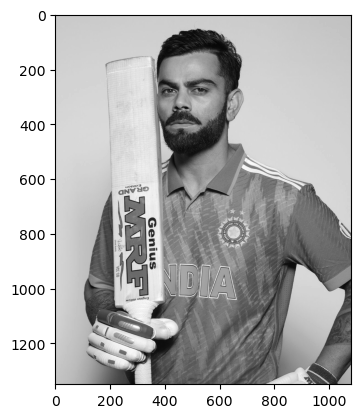

In [9]:
plt.imshow(gray, cmap="gray")

In [10]:
faceCascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = faceCascade.detectMultiScale(gray, 1.3, 5)

faces

array([[313, 150, 313, 313]])

In [11]:
(x,y,w,h) = faces[0]

x,y,w,h

(313, 150, 313, 313)

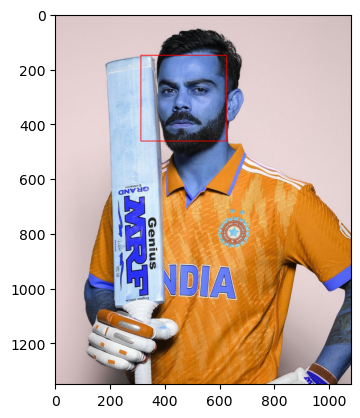

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

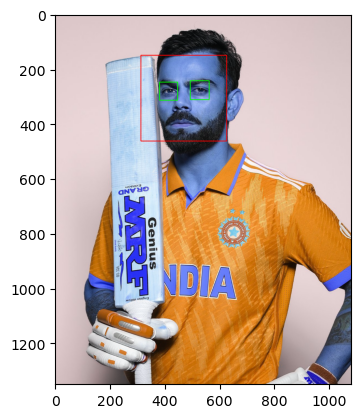

In [13]:
cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

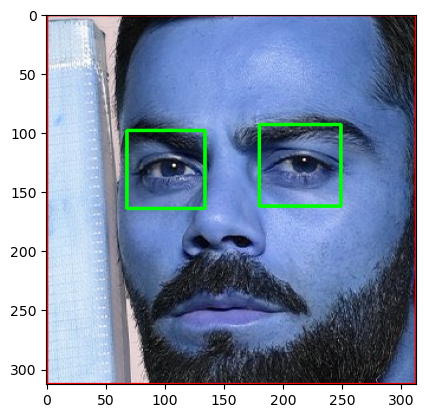

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

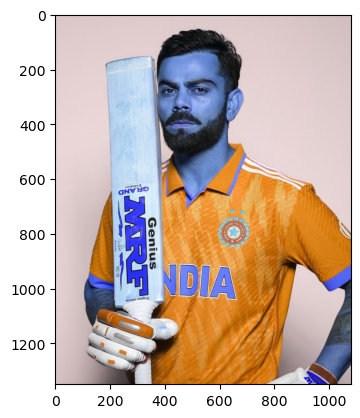

In [16]:
img = cv2.imread('./test_images/virat_kohli.jpg_large')
plt.imshow(img)

In [17]:
img_2 = cv2.imread('../test_images/virat_img.jpg')
# plt.imshow(img_2)

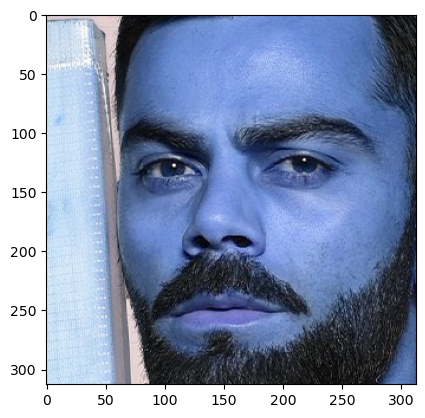

In [18]:
img_with_no_eyes = get_cropped_image_if_2_eyes('./test_images/virat_img.jpg')
img_with_no_eyes

cropped_image = get_cropped_image_if_2_eyes('./test_images/virat_kohli.jpg_large')
plt.imshow(cropped_image)

In [20]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

print(img_dirs)

['./dataset/.ipynb_checkpoints', './dataset/roman_reigns', './dataset/virat_kohli']


In [22]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
cropped_images_dirs = []
celebrity_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_name_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_images_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_img_file = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_img_file

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count += 1

# print(celebrity_file_name_dict)

.ipynb_checkpoints
roman_reigns
Generating cropped images in folder:  ./dataset/cropped/roman_reigns
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [24]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    return imArray_H

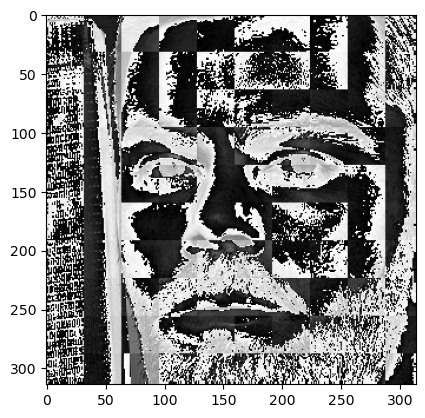

In [25]:
im_har = w2d(cropped_image,'db1',5)

plt.imshow(im_har,cmap='gray')

In [26]:
celebrity_file_name_dict

{'.ipynb_checkpoints': [],
 'roman_reigns': ['./dataset/cropped/roman_reigns/roman_reigns1.png',
  './dataset/cropped/roman_reigns/roman_reigns2.png',
  './dataset/cropped/roman_reigns/roman_reigns3.png',
  './dataset/cropped/roman_reigns/roman_reigns4.png',
  './dataset/cropped/roman_reigns/roman_reigns5.png',
  './dataset/cropped/roman_reigns/roman_reigns6.png',
  './dataset/cropped/roman_reigns/roman_reigns7.png',
  './dataset/cropped/roman_reigns/roman_reigns8.png',
  './dataset/cropped/roman_reigns/roman_reigns9.png',
  './dataset/cropped/roman_reigns/roman_reigns10.png',
  './dataset/cropped/roman_reigns/roman_reigns11.png',
  './dataset/cropped/roman_reigns/roman_reigns12.png',
  './dataset/cropped/roman_reigns/roman_reigns13.png',
  './dataset/cropped/roman_reigns/roman_reigns14.png',
  './dataset/cropped/roman_reigns/roman_reigns15.png',
  './dataset/cropped/roman_reigns/roman_reigns16.png',
  './dataset/cropped/roman_reigns/roman_reigns17.png'],
 'virat_kohli': ['./dataset/cr

In [27]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_name_dict.keys():
    if celebrity_name != '.ipynb_checkpoints':
        class_dict[celebrity_name] = count
        count += 1
class_dict

{'roman_reigns': 0, 'virat_kohli': 1}

In [28]:
X = []
Y = []
for celebrity_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(class_dict[celebrity_name])

In [29]:
len(X)

39

In [30]:
len(X[0])

4096

In [31]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(39, 4096)

In [32]:
X[0]

array([146., 178., 249., ..., 233., 199., 204.])

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc',SVC(kernel = 'rbf',C = 10))])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.88      1.00      0.93         7

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.86,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.72,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.90,{'logisticregression__C': 1}


In [39]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(X_test, y_test)

0.9

In [41]:
best_estimators['random_forest'].score(X_test, y_test)

0.5

In [42]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.9

In [43]:
best_clf = best_estimators['svm']

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[2, 1],
       [0, 7]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

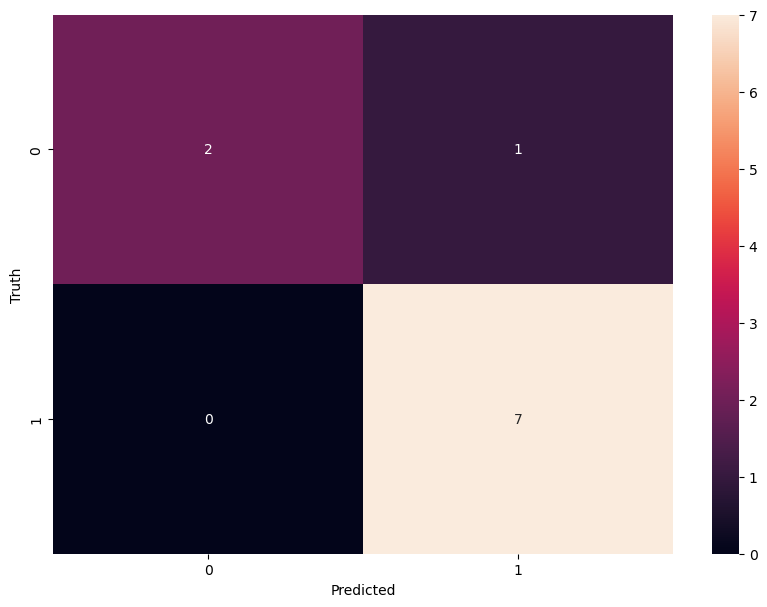

In [45]:
# !pip install seaborn --upgrade
import seaborn as sns

sns.__version__
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
# !pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [48]:
import json
with open("class_dictionary.json",'w') as f:
    f.write(json.dumps(class_dict))